In [1]:
import numpy as np
# df = np.loadtxt('ex3data1.txt', delimiter=',')

import scipy.io
mat = scipy.io.loadmat('ex4data1.mat')

In [2]:
X = mat['X']

In [3]:
y = mat['y']
y[:5]
# label 10 means number 0

array([[10],
       [10],
       [10],
       [10],
       [10]], dtype=uint8)

In [4]:
len(X[0])

400

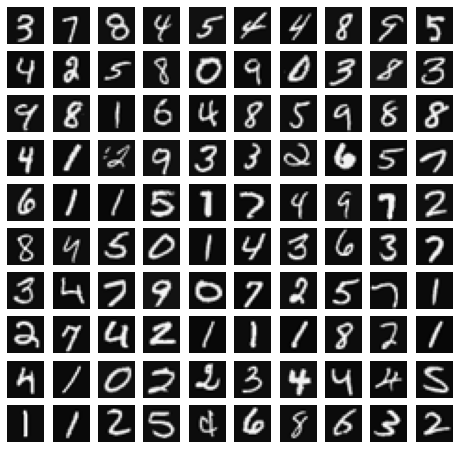

In [5]:
# https://towardsdatascience.com/andrew-ngs-machine-learning-course-in-python-neural-networks-e526b41fdcd9

import matplotlib.pyplot as plt
fig, axis = plt.subplots(10,10,figsize=(8,8))
for i in range(10):
    for j in range(10):
        axis[i,j].imshow(X[np.random.randint(0,5001),:].reshape(20,20,order="F"), cmap="gray") #reshape back to 20 pixel by 20 pixel
        axis[i,j].axis("off")

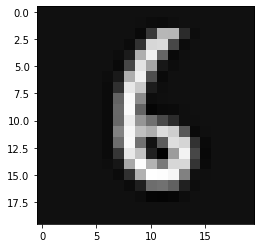

In [6]:
plt.imshow(X[3092].reshape(20,20,order="F"), cmap="gray")

In [231]:
# load pretrained weights
# weights = scipy.io.loadmat('ex4weights.mat')
weights = scipy.io.loadmat('weights_ellissa.mat')
Theta1 = weights['Theta1']
Theta2 = weights['Theta2']
Thetas = [Theta1, Theta2]

In [9]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [10]:
def sigmoid_gradient(z):
    return sigmoid(z)*(1-sigmoid(z))

# test
sigmoid_gradient(np.array([[0, 1], [0, 2]]))

array([[0.25      , 0.19661193],
       [0.25      , 0.10499359]])

In [165]:
def initialize_Thetas(input_size, hidden_layer_size, output_size):
    Thetas = []
    Thetas.append(np.random.uniform(-0.12, 0.12, [hidden_layer_size, input_size + 1]))
    Thetas.append(np.random.uniform(-0.12, 0.12, [output_size, hidden_layer_size + 1]))
    return Thetas

def one_hot_encode(y):
    n_values = np.max(y.flatten())
    return np.eye(n_values)[y.flatten()-1]

def initialize_Gradients(input_size, hidden_layer_size, output_size):
    Gradients = []
    Gradients.append(np.zeros([hidden_layer_size, input_size + 1]))
    Gradients.append(np.zeros([output_size, hidden_layer_size + 1]))
    return Gradients

def get_activations_by_single_feed_forward(x, Thetas):
    activations = []
    activations.append(np.concatenate(([1],x))) # add intercept
    for i in range(len(Thetas)):
        next_activations = sigmoid(activations[i].dot(np.transpose(Thetas[i])))
        if i == len(Thetas) - 1:
            activations.append(next_activations)
        else:
            activations.append(np.concatenate(([1],next_activations))) # add intercept
    return activations

def get_deltas_by_back_prop(y, activations, Thetas):
    deltas = []
    deltas.append(activations[-1] - y)
    for i in reversed(range(1, len(Thetas))):
        previous_deltas = np.transpose(Thetas[i]).dot(deltas[0])*activations[i]*(1-activations[i])
        deltas.insert(0, previous_deltas)
    return deltas

def accumulate_Gradients(Gradients, activations, deltas):
    for i in range(len(Gradients)):
        if i == len(Gradients) - 1:
            Gradients[i] = Gradients[i] + np.outer(deltas[i], activations[i])
        else:
            Gradients[i] = Gradients[i] + np.outer(deltas[i][1:], activations[i])
    return Gradients

def regularlize_Gradients(Gradients, llambda, Thetas, X):
    for i in range(len(Gradients)):
        Gradients[i] = Gradients[i] / len(X) + np.c_[ np.zeros(Thetas[i].shape[0]), Thetas[i][:, 1:] ] * llambda / len(X)
    return Gradients

def gradient_descent_step(Thetas, Gradients, alfa):
    for i in range(len(Thetas)):
        Thetas[i] = Thetas[i] - alfa * Gradients[i]
    return Thetas
    
def predict_vector(X, Thetas):
    activations = X
    for i in range(len(Thetas)):
        activations = np.c_[ np.ones(len(activations)), activations ] # add intercept
        activations = sigmoid(activations.dot(np.transpose(Thetas[i])))
    return activations

def predict_point(X, Thetas):
    activations = predict_vector(X, Thetas)
    y_predicted = np.argmax(activations, axis=1) + 1 
    return y_predicted

def loss(X, y_one_hot, Thetas, llambda):
    y = y_one_hot
    total_loss = 0
    for i in range(len(y[0])):
        total_loss = total_loss + (-y[:, i].dot(np.log(predict_vector(X, Thetas)[:, i]))-(1-y[:, i]).dot(np.log(1-predict_vector(X, Thetas)[:, i])))/len(X)
    for i in range(len(Thetas)):
        relevant_thetas = Thetas[i][:, 1:].flatten()
        total_loss = total_loss + llambda/2/len(X)*relevant_thetas.dot(relevant_thetas)
    return total_loss

In [232]:
# train
iterations = 1000
alfa = 1
llambda = 1
losses = np.zeros(iterations)
# Thetas = initialize_Thetas(400, 25, 10)

for iteration in range(iterations):
    print(iteration)
    Gradients = initialize_Gradients(400, 25, 10)
    for i in range(len(X)):
        activations = get_activations_by_single_feed_forward(X[i], Thetas)
        deltas = get_deltas_by_back_prop(one_hot_encode(y)[i], activations, Thetas)
        Gradients = accumulate_Gradients(Gradients, activations, deltas)
    Gradients = regularlize_Gradients(Gradients, llambda, Thetas, X)
    Thetas = gradient_descent_step(Thetas, Gradients, alfa)
    losses[iteration] = loss(X, one_hot_encode(y), Thetas, llambda)
    print(losses[iteration])

0
0.5021920832517107
1
0.502164370733158
2
0.5021366700943826
3
0.502108981329856
4
0.5020813044341417
5
0.5020536394018924
6
0.5020259862278516
7
0.501998344906853
8
0.5019707154338198
9
0.5019430978037658
10
0.5019154920117941
11
0.5018878980530972
12
0.5018603159229578
13
0.5018327456167471
14
0.5018051871299258
15
0.5017776404580436
16
0.5017501055967388
17
0.5017225825417384
18
0.5016950712888576
19
0.501667571834
20
0.5016400841731573
21
0.5016126083024086
22
0.5015851442179209
23
0.5015576919159486
24
0.5015302513928329
25
0.5015028226450025
26
0.5014754056689719
27
0.5014480004613426
28
0.5014206070188025
29
0.5013932253381248
30
0.5013658554161686
31
0.5013384972498788
32
0.5013111508362847
33
0.5012838161725011
34
0.5012564932557267
35
0.5012291820832451
36
0.5012018826524236
37
0.5011745949607128
38
0.5011473190056474
39
0.5011200547848447
40
0.5010928022960043
41
0.5010655615369092
42
0.5010383325054237
43
0.5010111151994943
44
0.5009839096171482
45
0.5009567157564945
46
0.

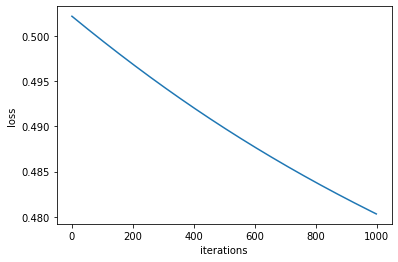

In [233]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('iterations')
plt.show()

In [234]:
# predict
y_predicted = predict_point(X, Thetas)

In [235]:
def print_accuracy(y, y_predicted):
    TP = 0
    for i in range(len(y)):
        TP += np.where(y[i] == y_predicted[i],1,0)
    print("accuracy:   {}".format(np.round(TP/len(y),3)))

In [236]:
print_accuracy(y, y_predicted)

accuracy:   [0.965]


In [237]:
dict_weights = {'Theta1': Thetas[0], 'Theta2': Thetas[1]}
scipy.io.savemat('weights_ellissa.mat', dict_weights)